<a href="https://colab.research.google.com/github/Andy-2004/Analise-de-dados-em-Python/blob/main/Analise_Base_de_Dados_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analise de dados em base de Vendas**
 *Claudemir Cerqueira*

In [1]:
#importando bibliotecas
import  pandas  as  pd
import  matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#Upload de arquivos
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
#Criando datataframe
df = pd.read_excel("/content/AdventureWorks.xlsx")

In [4]:
#Visualizando as 5 primeiras linha
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [6]:
#Tipo de dados da base
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
#Qual a receita total // como acha receita total
df["Valor Venda"].sum()

5984606.1426

In [12]:
#Custo Total// tem mult. custo unit.por qtde fazendo nova coluna custo
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])#criando nova coluna

In [13]:
#Imprimindo uma linha
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [15]:
#Custo total 
round(df["custo"].sum(), 2)#colocando retorno de 2 casas decimais

2486783.05

In [16]:
#Achando o lucro total 
#Criando uma coluna de lucro que é valor da vendas - custo
df["lucro"] = df["Valor Venda"] - df["custo"]

In [17]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [19]:
#total de lucros
round(df["lucro"].sum(),2)

3497823.09

In [21]:
#Criando coluna com qtde de dias q foi enviado Produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [22]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


**A media de tempo de envio para cada marca**

In [86]:
#Fazendo a coluna tempo_envio tirar a palavra day
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [24]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [26]:
df.dtypes #consultando o tipo de cada coluna

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
custo                    float64
lucro                    float64
Tempo_envio                int64
dtype: object

In [27]:
df["Tempo_envio"].dtypes #consultando somente unica coluna para saber o tipo

dtype('int64')

In [40]:
#Saber a media do tempo de envio por marca
df.groupby("Marca")["Tempo_envio"].mean() #estamos agrupando a coluna marca e a coluna tempo_envio

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo_envio, dtype: float64

In [ ]:
#Grafico media do tempo

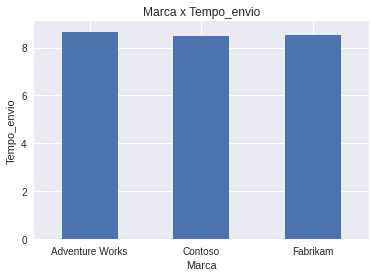

In [85]:
df.groupby("Marca")["Tempo_envio"].mean().plot.bar(title="Marca x Tempo_envio") 
plt.xlabel("Marca")
plt.ylabel("Tempo_envio")
plt.xticks(rotation='horizontal');

In [38]:
#Verificando se tem valores nulos na base
df.isnull().sum().reset_index()

,index,0
0,Data Venda,0
1,Data Envio,0
2,ID Loja,0
3,ID Produto,0
4,ID Cliente,0
5,No. Venda,0
6,Custo Unitário,0
7,Preço Unitário,0
8,Quantidade,0
9,Valor Desconto,0


In [84]:
#Fazendo um agrupamento por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [32]:
#Configurando o formato dos numreros
#float em 2 casa decimais
pd.options.display.float_format = '{:20,.2f}'.format 

In [36]:
#Melhorando a planilha e trazendo as informações em colunas com reset_index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [42]:
#Total de produtos vendidos
#fazendo o agrupamento das colunas Produto e Qtde
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).reset_index() #sort traz os valores do maior para o menor


,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


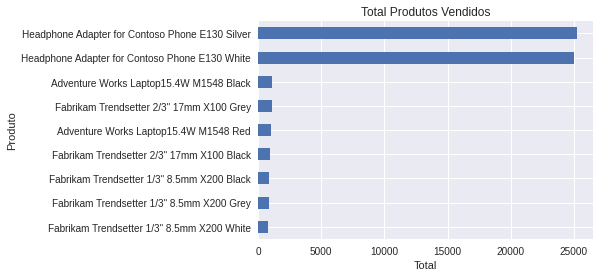

In [44]:
#Grafico do total vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")#garfico de barra horizontal
plt.xlabel("Total")
plt.ylabel("Produto");

In [83]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).reset_index()

,Produto,Quantidade
0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789
1,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
2,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
3,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
6,Adventure Works Laptop15.4W M1548 Black,1089
7,Headphone Adapter for Contoso Phone E130 White,25008
8,Headphone Adapter for Contoso Phone E130 Silver,25232


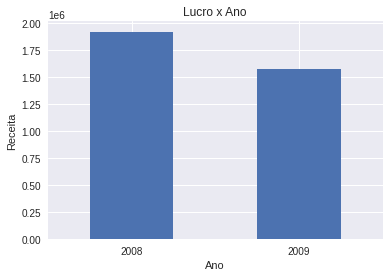

In [65]:
#Saber o lucro por ano agrupando data venda e lucro grafico vertical
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano") #.dt.year extrai somento o ano da coluna data venda
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.xticks(rotation='horizontal');

In [49]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().reset_index()

,Data Venda,lucro
0,2008,"1,920,077.71"
1,2009,"1,577,745.38"


**Fazendo analise somente do ano de 2009 na base**

In [50]:
#Trazendo somente as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]#Cria df_2009 e traz somente esse ano de vendas

In [53]:
df_2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11


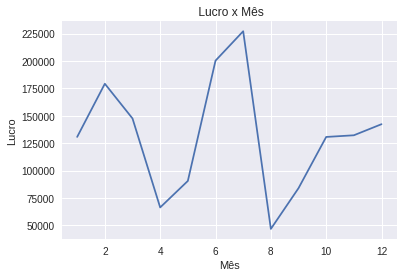

In [54]:
#Grafico de linhas lucro por mês somente de 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title=" Lucro x Mês") #.plot é garfico de linha
plt.xlabel("Mês")
plt.ylabel("Lucro");

In [55]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().reset_index()

,Data Venda,lucro
0,1,"130,719.04"
1,2,"179,228.92"
2,3,"147,538.25"
3,4,"66,354.39"
4,5,"90,540.00"
5,6,"200,310.41"
6,7,"227,134.51"
7,8,"46,756.42"
8,9,"83,952.62"
9,10,"130,678.05"


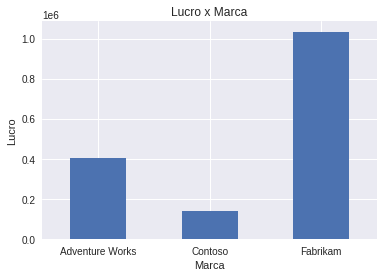

In [56]:
#Garfico de lucro por marca
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal'); #aqui estou fazendo o eixo x ficar na horizontal


In [57]:
df_2009.groupby("Marca")["lucro"].sum().reset_index()

,Marca,lucro
0,Adventure Works,"405,395.08"
1,Contoso,"138,258.95"
2,Fabrikam,"1,034,091.35"


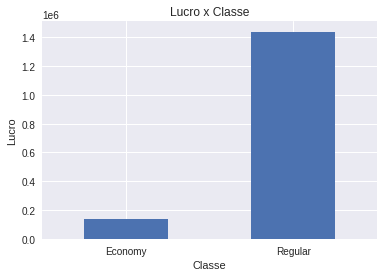

In [58]:
#Grafico de lucro por classe// que esta trazendo lucro maior
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');


In [59]:
df_2009.groupby("Classe")["lucro"].sum().reset_index()

,Classe,lucro
0,Economy,"138,258.95"
1,Regular,"1,439,486.43"


In [60]:
#analise estatística
df["Tempo_envio"].describe().reset_index()

,index,Tempo_envio
0,count,904.00
1,mean,8.54
2,std,3.06
3,min,4.00
4,25%,6.00
5,50%,9.00
6,75%,11.00
7,max,20.00


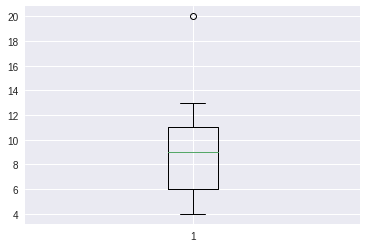

In [61]:
#Grafico de Boxplot // de estatística
plt.boxplot(df["Tempo_envio"]);

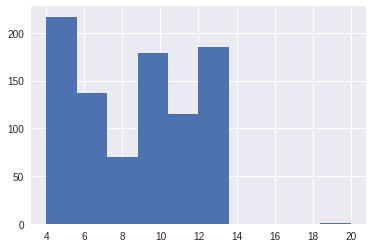

In [64]:
#histograma Estatística
plt.hist(df["Tempo_envio"]);

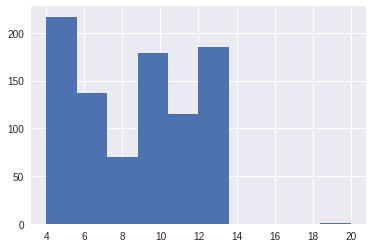

In [67]:
#Tempo mínimo em grafico
plt.hist(df["Tempo_envio"]);

In [71]:
#tempo maximo 
df["Tempo_envio"].max()

20

In [70]:
df["Tempo_envio"].min()

4

In [73]:
#Identificando o maximo da coluna tempo_envio
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [74]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
custo                    float64
lucro                    float64
Tempo_envio                int64
dtype: object

**Fazendo analise somente do ano de 2008 na base**

In [75]:
#Trazendo somente as vendas de 2008
df_2008 = df[df["Data Venda"].dt.year == 2008]

In [76]:
df_2008.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",7


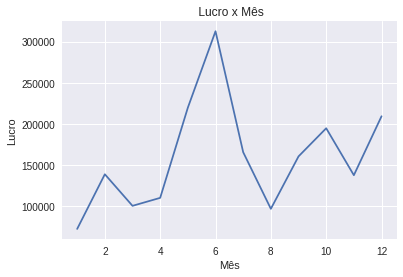

In [77]:
#Grafico de linhas lucro por mês somente de 2008
df_2008.groupby(df_2008["Data Venda"].dt.month)["lucro"].sum().plot(title=" Lucro x Mês") #.plot é garfico de linha
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [78]:
df_2008.groupby(df_2008["Data Venda"].dt.month)["lucro"].sum().reset_index()

,Data Venda,lucro
0,1,"72,633.44"
1,2,"138,956.89"
2,3,"100,646.32"
3,4,"110,316.55"
4,5,"219,766.94"
5,6,"312,484.37"
6,7,"165,717.63"
7,8,"97,024.11"
8,9,"160,624.43"
9,10,"194,786.37"


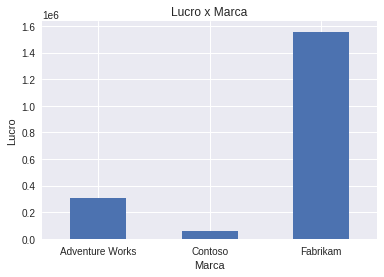

In [79]:
#Garfico de lucro por marca
df_2008.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal'); #aqui estou fazendo o eixo x ficar na horizontal

In [80]:
df_2008.groupby("Marca")["lucro"].sum().reset_index()

,Marca,lucro
0,Adventure Works,"306,641.16"
1,Contoso,"56,416.00"
2,Fabrikam,"1,557,020.55"


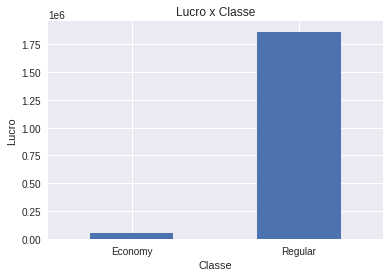

In [81]:
#Grafico de lucro por classe// que esta trazendo lucro maior
df_2008.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [82]:
df_2008.groupby("Classe")["lucro"].sum().reset_index()

,Classe,lucro
0,Economy,"56,416.00"
1,Regular,"1,863,661.71"


In [ ]:
#Salvando projeto em csv

In [87]:
df.to_csv("df_venda_projeto_pronto.csv", index=False)